In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("Group_17_data_cleaned.csv")
df.head()

,date,Usage_kWh,Lagging_Current_Reactive_Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2_tCO2,Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,Dummy_Weekend,Dummy_Monday,Dummy_Saturday,Dummy_Sunday,Dummy_Thursday,Dummy_Tuesday,Dummy_Wednesday,Dummy_Maximum_Load,Dummy_Medium_Load
0,2018-01-01 00:15:00,3.17,2.95,0.0,0.0,73.21,100.0,900,0,1,0,0,0,0,0,0,0
1,2018-01-01 00:30:00,4.00,4.46,0.0,0.0,66.77,100.0,1800,0,1,0,0,0,0,0,0,0
2,2018-01-01 00:45:00,3.24,3.28,0.0,0.0,70.28,100.0,2700,0,1,0,0,0,0,0,0,0
3,2018-01-01 01:00:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,0,1,0,0,0,0,0,0,0
4,2018-01-01 01:15:00,3.82,4.50,0.0,0.0,64.72,100.0,4500,0,1,0,0,0,0,0,0,0


In [4]:
df.columns

Index(['date', 'Usage_kWh', 'Lagging_Current_Reactive_Power_kVarh',
       'Leading_Current_Reactive_Power_kVarh', 'CO2_tCO2',
       'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM',
       'Dummy_Weekend', 'Dummy_Monday', 'Dummy_Saturday', 'Dummy_Sunday',
       'Dummy_Thursday', 'Dummy_Tuesday', 'Dummy_Wednesday',
       'Dummy_Maximum_Load', 'Dummy_Medium_Load'],
      dtype='object')

In [5]:
df = df.dropna(axis=0)

In [6]:
df['date'] = pd.to_datetime(df['date'])
df['date'] = df['date'].astype('int64') // 10**9  # convert to seconds

In [7]:
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.decomposition import PCA

data_scaled = preprocessing.scale(df)
df_scaled = pd.DataFrame(data_scaled, columns = df.columns)  

df_scaled  

,date,Usage_kWh,Lagging_Current_Reactive_Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2_tCO2,Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,Dummy_Weekend,Dummy_Monday,Dummy_Saturday,Dummy_Sunday,Dummy_Thursday,Dummy_Tuesday,Dummy_Wednesday,Dummy_Maximum_Load,Dummy_Medium_Load
0,-1.731903,-0.724105,-0.618516,-0.521385,-0.707283,-0.389643,0.513268,-1.678015,-0.631243,2.426271,-0.407596,-0.407596,-0.407596,-0.407596,-0.407596,-0.511746,-0.618527
1,-1.731804,-0.699287,-0.525911,-0.521385,-0.707283,-0.730092,0.513268,-1.641929,-0.631243,2.426271,-0.407596,-0.407596,-0.407596,-0.407596,-0.407596,-0.511746,-0.618527
2,-1.731705,-0.722012,-0.598278,-0.521385,-0.707283,-0.544537,0.513268,-1.605843,-0.631243,2.426271,-0.407596,-0.407596,-0.407596,-0.407596,-0.407596,-0.511746,-0.618527
3,-1.731606,-0.719919,-0.581106,-0.521385,-0.707283,-0.660311,0.513268,-1.569756,-0.631243,2.426271,-0.407596,-0.407596,-0.407596,-0.407596,-0.407596,-0.511746,-0.618527
4,-1.731507,-0.704669,-0.523458,-0.521385,-0.707283,-0.838465,0.513268,-1.533670,-0.631243,2.426271,-0.407596,-0.407596,-0.407596,-0.407596,-0.407596,-0.511746,-0.618527
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35035,1.731705,-0.703772,-0.501380,-0.521385,-0.707283,-0.976971,0.513268,1.605843,-0.631243,2.426271,-0.407596,-0.407596,-0.407596,-0.407596,-0.407596,-0.511746,-0.618527
35036,1.731804,-0.707061,-0.570067,-0.521385,-0.707283,-0.521805,0.513268,1.641929,-0.631243,2.426271,-0.407596,-0.407596,-0.407596,-0.407596,-0.407596,-0.511746,-0.618527
35037,1.731903,-0.705865,-0.605024,-0.511957,-0.707283,-0.209374,0.512611,1.678015,-0.631243,2.426271,-0.407596,-0.407596,-0.407596,-0.407596,-0.407596,-0.511746,-0.618527
35038,1.732001,-0.705865,-0.611770,-0.506569,-0.707283,-0.151223,0.511954,1.714102,-0.631243,2.426271,-0.407596,-0.407596,-0.407596,-0.407596,-0.407596,-0.511746,-0.618527


In [8]:
pca = PCA()
X_pca = pca.fit_transform(df_scaled)

# Convert to dataframe
component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
X_pca = pd.DataFrame(X_pca, columns=component_names)

X_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17
0,-0.295974,-2.034182,-0.922728,0.062775,2.045741,-1.164469,-0.285457,-0.625174,1.888192,-0.612083,-0.702572,-0.260352,-0.057847,0.236123,0.107442,-0.060598,6.242784e-16
1,-0.258944,-2.183605,-0.921132,0.084228,2.045438,-1.160856,-0.287755,-0.667142,1.857378,-0.560960,-0.453515,-0.130245,-0.147605,0.154644,0.081244,-0.010039,-8.361863e-15
2,-0.290603,-2.080657,-0.930202,0.073627,2.046487,-1.162875,-0.287083,-0.638192,1.873504,-0.539637,-0.577989,-0.215419,-0.089083,0.188942,0.090426,-0.036475,-3.472581e-15
3,-0.286061,-2.123187,-0.934397,0.081473,2.046775,-1.161744,-0.288003,-0.648939,1.863312,-0.499296,-0.491278,-0.177816,-0.115218,0.154770,0.079003,-0.018215,3.851024e-15
4,-0.261266,-2.192378,-0.932584,0.092755,2.046856,-1.159631,-0.289709,-0.671652,1.845313,-0.463138,-0.348675,-0.112355,-0.160134,0.115321,0.066506,0.005431,4.957593e-16


In [9]:
pca.get_covariance()

array([[ 1.00002854e+00, -4.78101367e-02, -1.28086987e-02,
        -2.49829703e-02, -4.19497284e-02, -3.33680272e-02,
        -4.10492898e-03,  2.73965557e-03, -1.00811779e-02,
         4.28078006e-03, -1.19029962e-02, -1.11590589e-03,
         9.07603461e-03, -1.61434386e-02,  5.95149810e-04,
         2.03692556e-03,  3.05811377e-03],
       [-4.78101367e-02,  1.00002854e+00,  8.96175477e-01,
        -3.24931057e-01,  8.97531126e-01,  3.85961892e-01,
         3.53575799e-01,  2.34617023e-01, -2.95483262e-01,
         7.09505077e-02, -1.39768011e-01, -2.41821095e-01,
         9.41530018e-02,  8.58108358e-02,  5.93221448e-02,
         4.87805715e-01,  2.04526908e-01],
       [-1.28086987e-02,  8.96175477e-01,  1.00002854e+00,
        -4.05153240e-01,  8.03332615e-01,  1.44468895e-01,
         4.07727918e-01,  8.26647304e-02, -3.19878881e-01,
         7.76289747e-02, -1.68122209e-01, -2.44971566e-01,
         1.08023291e-01,  8.93672289e-02,  6.07494795e-02,
         4.12870780e-01,  5.2

In [10]:
explained_variance=pca.explained_variance_ratio_
explained_variance

array([2.38686440e-01, 1.71180721e-01, 1.04224644e-01, 7.03823467e-02,
       6.87884318e-02, 6.87088090e-02, 6.86458989e-02, 5.95778265e-02,
       5.85271598e-02, 3.48555426e-02, 1.93968037e-02, 1.22643683e-02,
       1.14393547e-02, 7.94812134e-03, 3.06068581e-03, 2.31284516e-03,
       8.50620395e-33])

In [11]:
loadings = pd.DataFrame(
    pca.components_.T,  # transpose the matrix of loadings
    columns=component_names,  # so the columns are the principal components
    index=df_scaled.columns,  # and the rows are the original features
)
loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17
date,-0.010772,-0.022693,-0.035665,-0.017349,0.076282,0.084328,0.011207,0.498643,-0.853287,-0.078856,-0.012529,-0.018918,0.002897,-0.015214,-0.031536,-0.005505,2.511697e-17
Usage_kWh,0.429823,0.201497,0.171876,0.004002,-0.003365,0.003270,-0.009990,-0.134557,-0.064424,-0.178965,0.068020,-0.004395,-0.005918,0.217137,-0.641234,0.477155,1.843236e-16
Lagging_Current_Reactive_Power_kVarh,0.424369,0.083843,0.165000,-0.018886,-0.001059,0.013829,-0.017165,-0.121625,-0.084029,-0.304682,0.529915,0.112828,-0.055134,0.326190,0.379749,-0.350627,-1.436242e-16
Leading_Current_Reactive_Power_kVarh,-0.300317,0.393489,-0.126858,-0.071467,-0.000679,0.000365,0.004215,0.154181,0.132948,-0.297548,0.183642,0.253414,-0.151689,-0.201440,-0.472284,-0.468180,1.861340e-16
CO2_tCO2,0.417161,0.194977,0.177485,0.007861,0.005160,-0.005116,-0.005116,-0.121703,-0.063731,-0.118973,-0.112759,-0.118484,0.060946,-0.820723,0.131709,-0.043477,-1.255958e-17
Lagging_Current_Power_Factor,0.041360,0.524296,0.047009,-0.066501,0.001932,-0.006076,-0.000641,0.084516,0.057059,-0.168389,-0.537784,-0.374288,0.264072,0.342039,0.128404,-0.213216,1.197805e-17
Leading_Current_Power_Factor,0.318925,-0.378540,0.091384,0.109306,-0.003455,-0.001314,0.005686,-0.152908,-0.098568,0.320124,-0.268349,-0.013840,0.000273,0.086936,-0.381360,-0.611455,2.981843e-16
NSM,0.031740,0.451991,-0.053822,0.012870,0.014675,0.004845,-0.018829,0.037651,-0.053293,0.733242,0.421479,-0.212156,0.149559,-0.017380,-0.048002,-0.038852,-8.350927e-17
Dummy_Weekend,-0.303487,0.060565,0.554565,0.074432,0.001467,0.004108,-0.005890,-0.173413,-0.124117,0.029058,0.001843,-0.133926,-0.267724,0.012100,0.000275,-0.017434,-6.743173e-01
Dummy_Monday,0.083158,-0.022699,-0.168567,0.020977,0.779176,-0.353176,-0.109025,0.044566,0.072708,-0.028516,0.015251,-0.274633,-0.368928,0.010324,-0.002138,-0.004310,1.296718e-16


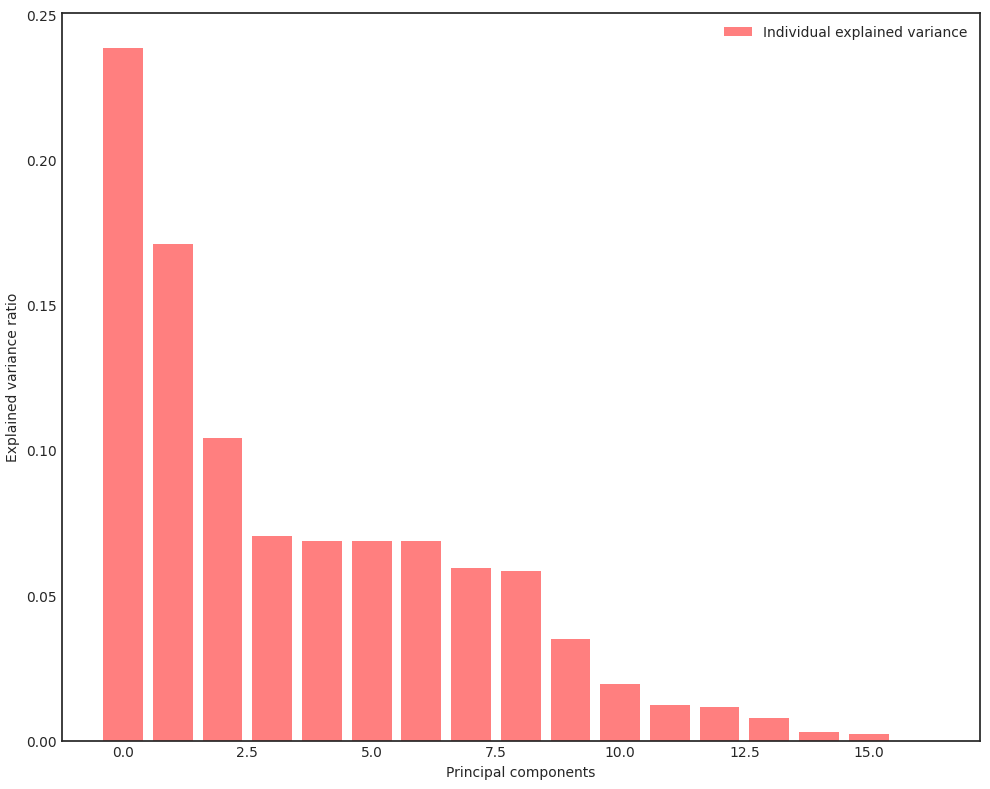

In [12]:
with plt.style.context('seaborn-white'):
    plt.figure(figsize=(10, 8))

    plt.bar(range(17), explained_variance, alpha=0.5, align='center',
            label='Individual explained variance',color='red')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

### If we look at the visualization graph we can see that the First three principal components are most detailing about data so Selecting them for visualization

In [13]:
pca_df = pd.DataFrame(X_pca)

In [14]:
pca_df.head(2)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17
0,-0.295974,-2.034182,-0.922728,0.062775,2.045741,-1.164469,-0.285457,-0.625174,1.888192,-0.612083,-0.702572,-0.260352,-0.057847,0.236123,0.107442,-0.060598,6.242784e-16
1,-0.258944,-2.183605,-0.921132,0.084228,2.045438,-1.160856,-0.287755,-0.667142,1.857378,-0.560960,-0.453515,-0.130245,-0.147605,0.154644,0.081244,-0.010039,-8.361863e-15


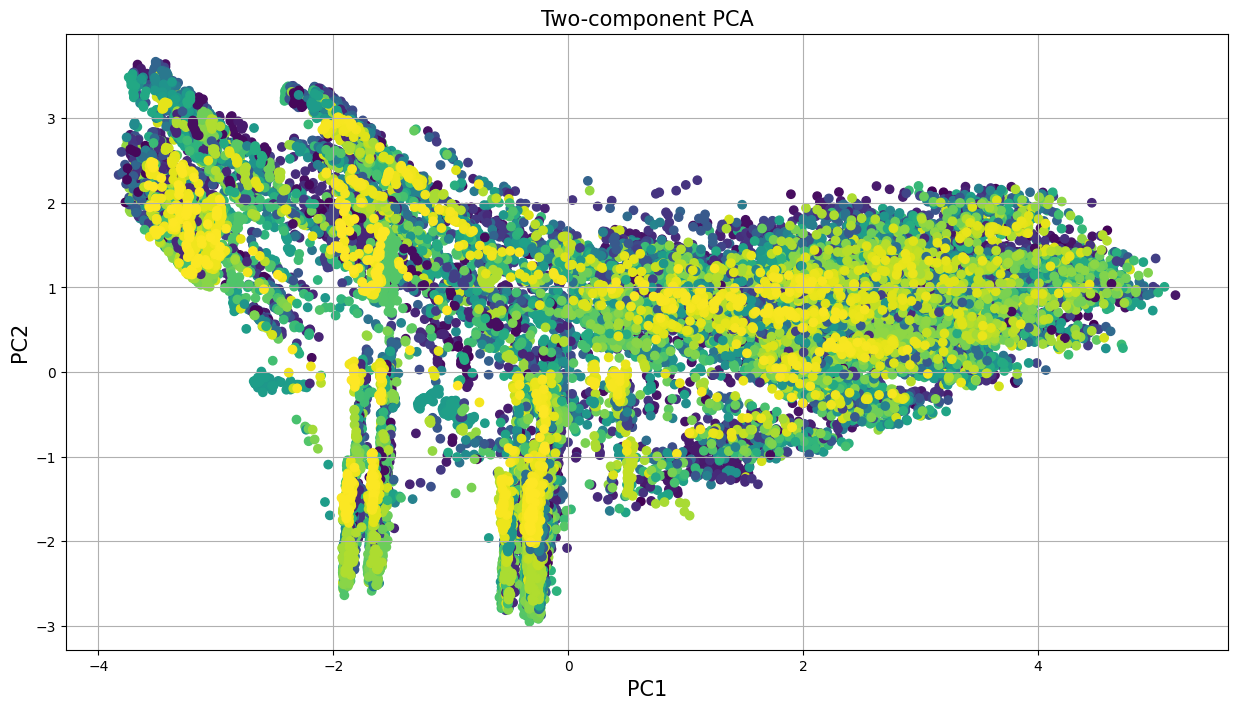

In [15]:
# Taking first 2 components for visualization
plt.figure(figsize=(15,8))
plt.scatter(pca_df.PC1, pca_df.PC2, c = df["date"])
plt.xlabel("PC1", fontsize = 15)
plt.ylabel("PC2", fontsize = 15)
plt.title("Two-component PCA", fontsize = 15)
plt.grid();

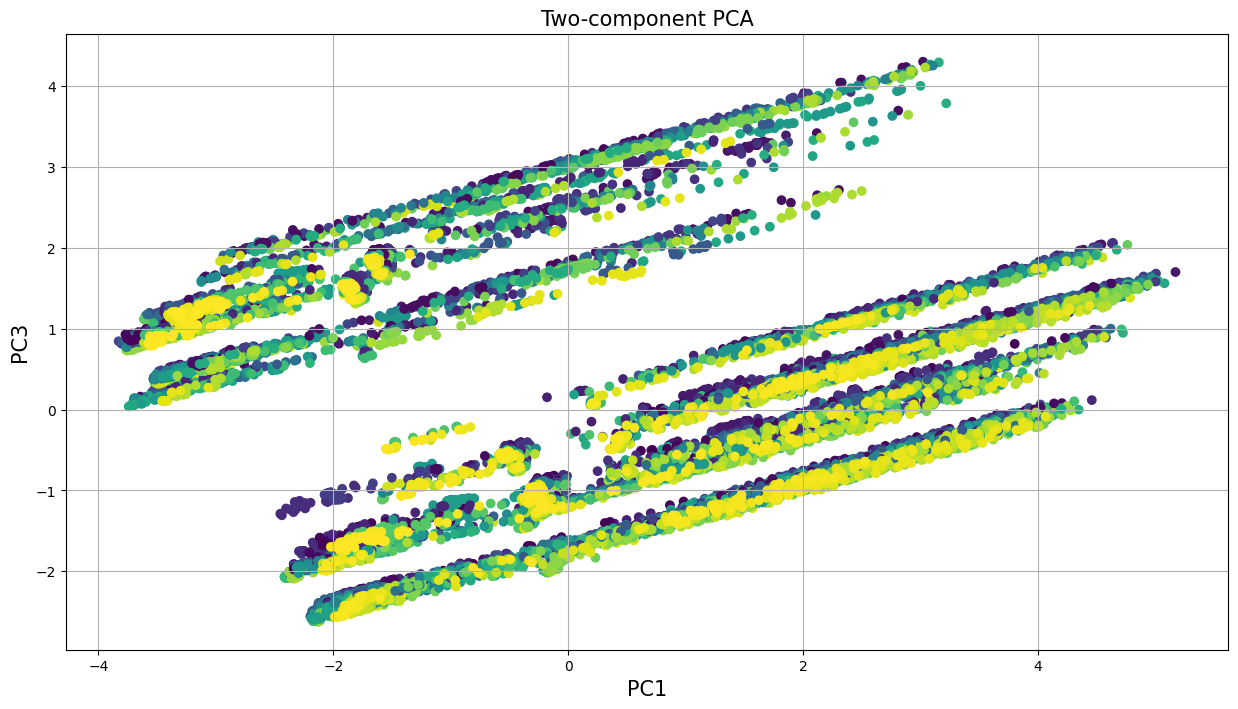

In [16]:
# Taking first and last components for visualization
plt.figure(figsize=(15,8))

plt.scatter(pca_df.PC1, pca_df.PC3, c = df["date"])
plt.xlabel("PC1", fontsize = 15)
plt.ylabel("PC3", fontsize = 15)
plt.title("Two-component PCA", fontsize = 15)
plt.grid();

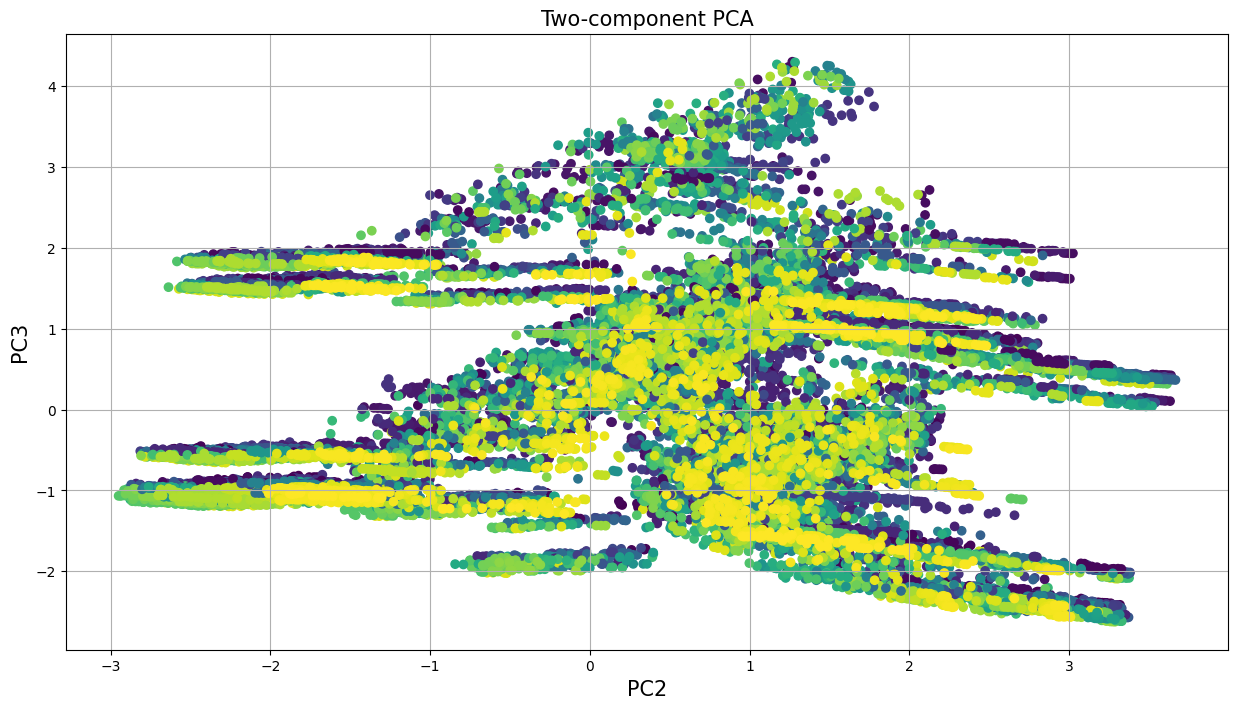

In [17]:
# Taking last 2 components for visualization
plt.figure(figsize=(15,8))

plt.scatter(pca_df.PC2, pca_df.PC3, c = df["date"])
plt.xlabel("PC2", fontsize = 15)
plt.ylabel("PC3", fontsize = 15)
plt.title("Two-component PCA", fontsize = 15)
plt.grid();

## Non Linear Dimensionality reduction - kernel PCA

In [18]:
from sklearn.decomposition import KernelPCA
kpca= KernelPCA(n_components=None,kernel = 'rbf',gamma = 10)

In [19]:
df_kernel = kpca.fit_transform(df_scaled[1:10000])

In [20]:
new_df = df_scaled[1:10000]
k = new_df['date']

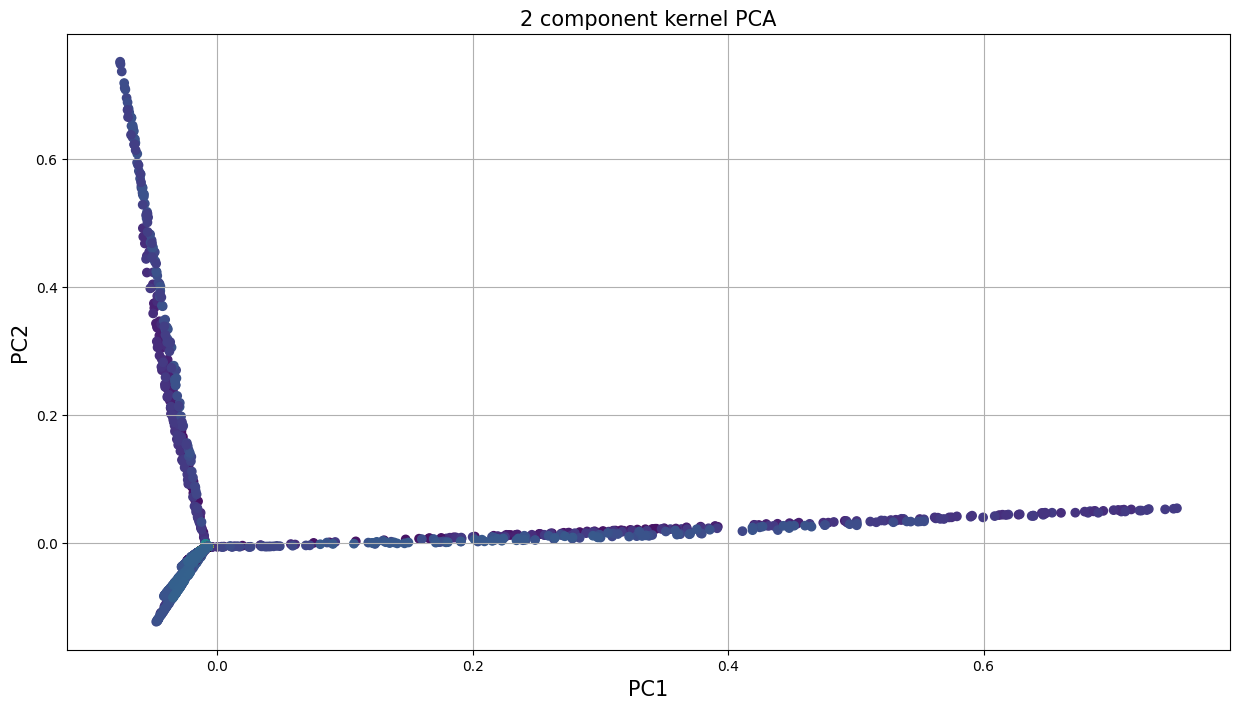

In [21]:
plt.figure(figsize=(15,8))
plt.scatter(df_kernel[:,0], df_kernel[:,1] ,c = k)
plt.xlabel("PC1", fontsize = 15)
plt.ylabel("PC2", fontsize = 15)
plt.title("2 component kernel PCA", fontsize = 15)
plt.grid();